In [1]:
#google
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#import packages
import os
import tensorflow as tf
import keras
from keras import layers
from keras.models import Model
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50

Using TensorFlow backend.


In [0]:
#load dataset
train_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment_2/dataset1/train/' #80
valid_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment_2/dataset1/val/' #10
test_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment_2/dataset1/test/' #10

In [0]:
#ImageGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
#datagen flow for multi-class
train_generator = train_datagen.flow_from_directory(train_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
valid_generator = test_datagen.flow_from_directory(valid_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)

Found 900 images belonging to 4 classes.
Found 113 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


In [6]:
#resnet101
model = ResNet50(weights= 'imagenet', include_top=False, input_tensor=None, input_shape=(224,224,3))

94773248/94765736 [==============================] - 2s 0us/step


In [7]:
#adding new layers
x = model.output
x = Flatten()(x)
#add fully connected layer
x = Dense(512,activation = "relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(512,activation = "relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
#add logistic layer
predictions = Dense(4, activation='softmax')(x)
#model to train
model = Model(input=model.input, output=predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
#unfreeze all BatchNormalization layers and freeze all except for last 7 layers
for layer in model.layers[:-7]:
    if "BatchNormalization" in layer.__class__.__name__:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5), metrics=['acc'])

In [11]:
#train model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=25,
      validation_data=valid_generator,
      validation_steps=10,  
      verbose=1)

Epoch 1/25
100/100 [==============================] - 280s 3s/step - loss: 1.2616 - acc: 0.5138 - val_loss: 1.5691 - val_acc: 0.2500
Epoch 2/25
100/100 [==============================] - 77s 766ms/step - loss: 0.6767 - acc: 0.7487 - val_loss: 3.0923 - val_acc: 0.2192
Epoch 3/25
100/100 [==============================] - 29s 295ms/step - loss: 0.4907 - acc: 0.8229 - val_loss: 5.4777 - val_acc: 0.2192
Epoch 4/25
100/100 [==============================] - 29s 294ms/step - loss: 0.5486 - acc: 0.8317 - val_loss: 3.0144 - val_acc: 0.2125
Epoch 5/25
100/100 [==============================] - 30s 296ms/step - loss: 0.3812 - acc: 0.8744 - val_loss: 3.8462 - val_acc: 0.2055
Epoch 6/25
100/100 [==============================] - 30s 295ms/step - loss: 0.3444 - acc: 0.8794 - val_loss: 0.1585 - val_acc: 0.3151
Epoch 7/25
100/100 [==============================] - 30s 295ms/step - loss: 0.3694 - acc: 0.8631 - val_loss: 2.3565 - val_acc: 0.4750
Epoch 8/25
100/100 [==============================] - 30s

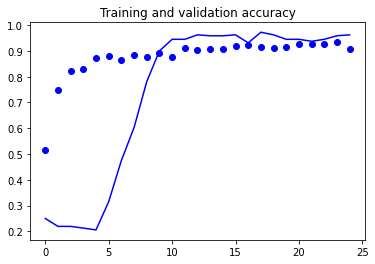

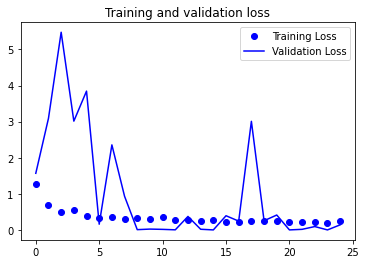

In [13]:
#plot graph
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()